## IS6 in Python:  Relationships Between Categorical Variables–Contingency Tables (Chapter 3)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

### Chapter 3: Relationships Between Categorical Variables–Contingency Tables
#### Section 3.1: Contingency Tables

In [133]:
#Read in libraries. These are all the libraries we need for this chapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#Table 3.1, page 68

okcupid = pd.read_csv("datasets/okcupid-catsdogs.txt", sep = "\t")

#Make contingency table
table = pd.crosstab(index = okcupid["CatsDogsBoth"], columns = okcupid["Gender"], margins = True, margins_name = "Total")
table

Gender,F,M,Total
CatsDogsBoth,,,
Has Both,897,577,1474
Has cats,3412,2388,5800
Has dogs,3431,3587,7018
Total,7740,6552,14292


#### New functions explained:
Note that in this example, pandas is called pd
1. pandas.read_csv(filepath, header = {int, list of int, None}). "header" argument is new, which lets us pick the row number(s) to use as the column names, and the start of the data.

2. pandas.crosstab(index = [series], columns = [series], margins = True/False, margins_name = "string"): Compute a contingency table, where "index" specifies values to group by rows, "columns" specifies values to group by columns, "margins" specifies whether to add row/column margins (subtotals) or not, and "margins_name" lets us rename the margin label.

In [135]:
#Table 3.2, page 69

okcupid = pd.read_csv("datasets/okcupid-catsdogs.txt", sep = "\t")
#Make contingency table, colunmn percent format
table = pd.crosstab(index = okcupid["CatsDogsBoth"], columns = okcupid["Gender"], margins = True, margins_name = "Total",
                    normalize = "columns")
table

Gender,F,M,Total
CatsDogsBoth,,,
Has Both,0.115891,0.088065,0.103135
Has cats,0.440827,0.364469,0.405821
Has dogs,0.443282,0.547466,0.491044


#### Same crosstab() function, new argument:

To make a contingency table, formatted as column percents, we still use the same crosstab() function. Very convenient!
Note that in this example, pandas is called pd

pandas.crosstab(..., normalize = {True, False} or {"all", "index", "columns"} or {0,1}): Everything in is the same as the crosstab() function introduced above, with the addition of normalize. Normalize allows us to divide all values by the sum of values.
- If passed ‘all’ or True, will normalize over all values.
- If passed ‘index’ will normalize over each row.
- If passed ‘columns’ will normalize over each column.
- If margins is True, will also normalize margin values.

We can multiply the dataframe by 100 to get values on the percent scale

In [136]:
#Table 3.3, page 69

okcupid = pd.read_csv("datasets/okcupid-catsdogs.txt", sep = "\t")

#Make contingency table, row percent format
table = pd.crosstab(index = okcupid["CatsDogsBoth"], columns = okcupid["Gender"], margins = True, margins_name = "Total",
                    normalize = "index")
table

Gender,F,M
CatsDogsBoth,,
Has Both,0.608548,0.391452
Has cats,0.588276,0.411724
Has dogs,0.488886,0.511114
Total,0.541562,0.458438


In [137]:
#Table 3.3, page 69

okcupid = pd.read_csv("datasets/okcupid-catsdogs.txt", sep = "\t")

#Make contingency table, table percent format
table = pd.crosstab(index = okcupid["CatsDogsBoth"], columns = okcupid["Gender"], margins = True, margins_name = "Total",
                    normalize = "all")
table

Gender,F,M,Total
CatsDogsBoth,,,
Has Both,0.062762,0.040372,0.103135
Has cats,0.238735,0.167086,0.405821
Has dogs,0.240064,0.250980,0.491044
Total,0.541562,0.458438,1.000000


#### Example 3.1: Exploring Marginal Distributions


In [138]:
#Example 3.1, page 69
superbowl = pd.read_csv("datasets/watch-the-super-bowl.txt", sep = "\t")

table = pd.crosstab(index = superbowl["Plan"], columns = superbowl["Sex"])
table

Sex,Female,Male
Plan,,
Commercials,156,81
Game,200,279
Wont Watch,160,132


In [139]:
#### Example 3.2: Exploring Percentages: Children and First-Class Ticket Holders First?

titanic = pd.read_csv("datasets/titanic_2020.txt", sep = "\t")
table = pd.crosstab(index = titanic["Class"], columns = titanic["Survived"], margins = True, normalize = "all")
table

Survived,LOST,SAVED,All
Class,,,
1st,0.055707,0.091033,0.146739
2nd,0.075181,0.053442,0.128623
3rd,0.239130,0.081975,0.321105
Crew,0.307518,0.096014,0.403533
All,0.677536,0.322464,1.000000


In [140]:
table = pd.crosstab(index = titanic["Class"], columns = titanic["Survived"], margins = True, normalize = "index")
table

Survived,LOST,SAVED
Class,,
1st,0.379630,0.620370
2nd,0.584507,0.415493
3rd,0.744711,0.255289
Crew,0.762065,0.237935
All,0.677536,0.322464


In [141]:
table = pd.crosstab(index = titanic["Class"], columns = titanic["Survived"], margins = True, normalize = "columns")
table

Survived,LOST,SAVED,All
Class,,,
1st,0.082219,0.282303,0.146739
2nd,0.110963,0.165730,0.128623
3rd,0.352941,0.254213,0.321105
Crew,0.453877,0.297753,0.403533


#### Section 3.2: Conditional Distributions

See displays on page 71 - 72

Gender  CatsDogsBoth
F       Has Both         897
        Has cats        3412
        Has dogs        3431
M       Has Both         577
        Has cats        2388
        Has dogs        3587
Name: CatsDogsBoth, dtype: int64


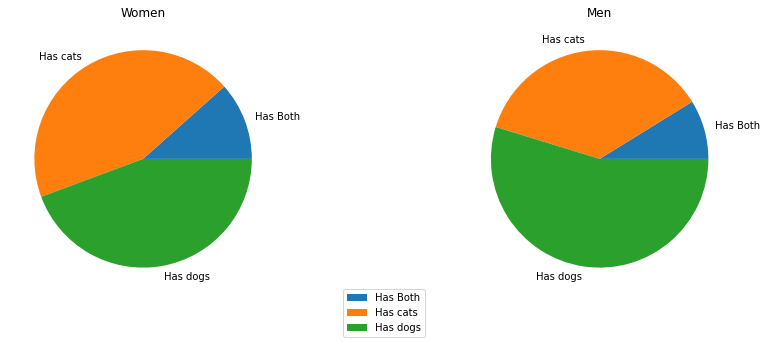

In [142]:
#Figure 3.1, page 71
okcupid = pd.read_csv("datasets/okcupid-catsdogs.txt", sep = "\t")

count = okcupid.groupby(["Gender", "CatsDogsBoth"])["CatsDogsBoth"].count()
print(count)

fig,ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].pie(x = count["F"], labels = count["F"].index)
ax[0].set_title("Women")

ax[1].pie(x = count["M"], labels = count["M"].index)
ax[1].set_title("Men")
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')


plt.show()

Question: This takes me a lot of time to figure out. Although the plot looks beautiful, it is also quite challenging. What do you think?

      CatsDogsBoth Gender
2         Has cats      M
13        Has dogs      F
14        Has cats      F
15        Has cats      F
25        Has dogs      M
...            ...    ...
59926     Has dogs      M
59929     Has Both      M
59931     Has Both      F
59936     Has cats      M
59938     Has dogs      F

[14292 rows x 2 columns]


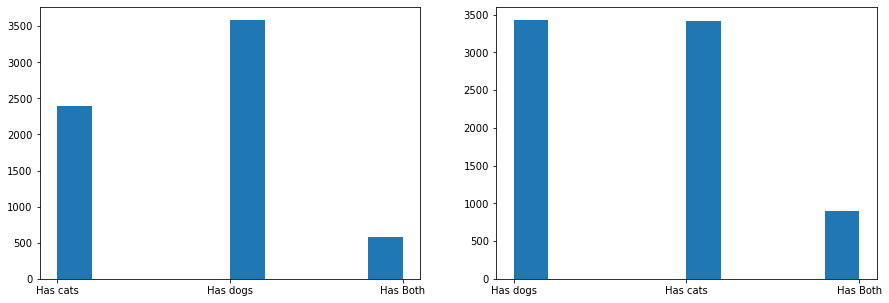

In [143]:
#Figure 3.2, page 71
okcupid = pd.read_csv("datasets/okcupid-catsdogs.txt", sep = "\t")

okcupid = okcupid[["CatsDogsBoth", "Gender"]].dropna()
print(okcupid)

fig,ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(okcupid[okcupid.Gender == "M"]["CatsDogsBoth"])
ax[1].hist(okcupid[okcupid.Gender == "F"]["CatsDogsBoth"])
plt.show()

#### Example 3.3: Finding Conditional Distributions: Watching the Super Bowl

In [144]:
#Example 3.3, page 72

superbowl = pd.read_csv("datasets/watch-the-super-bowl.txt", sep = "\t")

table = pd.crosstab(index = superbowl["Plan"], columns = superbowl["Sex"], margins = True)
table

Sex,Female,Male,All
Plan,,,
Commercials,156,81,237
Game,200,279,479
Wont Watch,160,132,292
All,516,492,1008


In [145]:
superbowl = pd.read_csv("datasets/watch-the-super-bowl.txt", sep = "\t")

table = pd.crosstab(index = superbowl["Plan"], columns = superbowl["Sex"], margins = True, normalize = "columns")
table

Sex,Female,Male,All
Plan,,,
Commercials,0.302326,0.164634,0.235119
Game,0.387597,0.567073,0.475198
Wont Watch,0.310078,0.268293,0.289683


#### Example 3.4: Looking for Associations Between Variables: Still Watching the Super Bowl

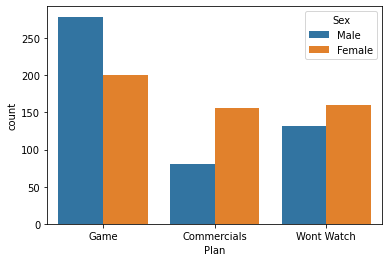

In [146]:
#Bar plot, page 73
superbowl = pd.read_csv("datasets/watch-the-super-bowl.txt", sep = "\t")

table = pd.crosstab(index = superbowl["Plan"], columns = superbowl["Sex"], margins = True, normalize = "columns")

sns.countplot(x = "Plan", data = superbowl, hue = "Sex")
plt.show()

#### Countplot explained:
countplot() is a special type of bar plot. The reason we introduced this new function here is because we need to plot our data by Sex, and plt.bar() does not provide this functionality. Here is a quick breakdown of the code used to generate this bar plot:

Code: sns.countplot(x = variable_name, data = data_frame, hue = variable_name)
- sns: sns is the conventional alias we use to name seaborn package
- countplot(): tell seaborn to plot a bar plot, with conditionals
- x: specifies the values for x-axis
- data: specifies the data_frame. Note that when we specify the data_frame, we can directly call its variable names without having to do something like data_frame[variable_name]
- hue: specifies which variable to use as the hue or color shade. This argument helps us "divide" our data

#### Examining Contingecy Tables
See displays on page 74

In [147]:
fish_diet = pd.read_csv("datasets/fish-diet.txt", sep = "\t")

table = pd.crosstab(index = fish_diet["Diet:Counts"], columns = fish_diet["Cancer:Counts"], margins = True, margins_name = "Total")
table

Cancer:Counts,No,Yes,Total
Diet:Counts,,,
Large,507,42,549
Moderate,2769,209,2978
Never,110,14,124
Small,2420,201,2621
Total,5806,466,6272


#### Random Matters
See displays on page 76

In [148]:
nightmares = pd.read_csv("datasets/nightmares.txt", sep = "\t")

table = pd.crosstab(index = nightmares["Dream"], columns = nightmares["Side"], margins = True, margins_name = "Total")
#Question: This line is only for aesthetics, do I need to explain it?
table = table.rename(index = {"N" : "Nightmare", "n" : "SweetDreams"})
print(table)

Side          L   R  Total
Dream                     
Nightmare     9   6     15
SweetDreams  13  35     48
Total        22  41     63


#### Section 3.3: Displaying Contingency Tables

In [149]:
#Table 3.5, page 78
titanic = pd.read_csv("datasets/titanic_2020.txt", sep = "\t")

table = pd.crosstab(index = titanic["Class"], columns = titanic["Survived"])
table

Survived,LOST,SAVED
Class,,
1st,123,201
2nd,166,118
3rd,528,181
Crew,679,212


In [150]:
table = pd.crosstab(index = titanic["Class"], columns = titanic["Survived"], normalize = True)
table

Survived,LOST,SAVED
Class,,
1st,0.055707,0.091033
2nd,0.075181,0.053442
3rd,0.239130,0.081975
Crew,0.307518,0.096014


Question: There is no way I can replicate the table 3.5 in the book. Prof. Horton also sectioned it into 2 tables. Is this ok?

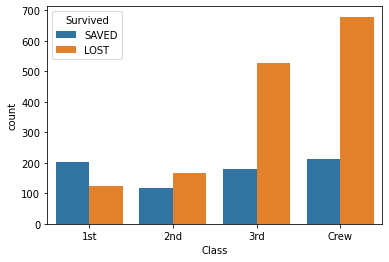

In [151]:
#Figure 3.4, page 78
titanic = pd.read_csv("datasets/titanic_2020.txt", sep = "\t")

sns.countplot(x = "Class", data = titanic, hue = "Survived", order = ["1st", "2nd", "3rd", "Crew"], hue_order = ["SAVED", "LOST"])
plt.show()

Question: The book displays in percentages. I don't know how to do that here. Or rather, I do know how to do that, but it gets a bit too complicated.

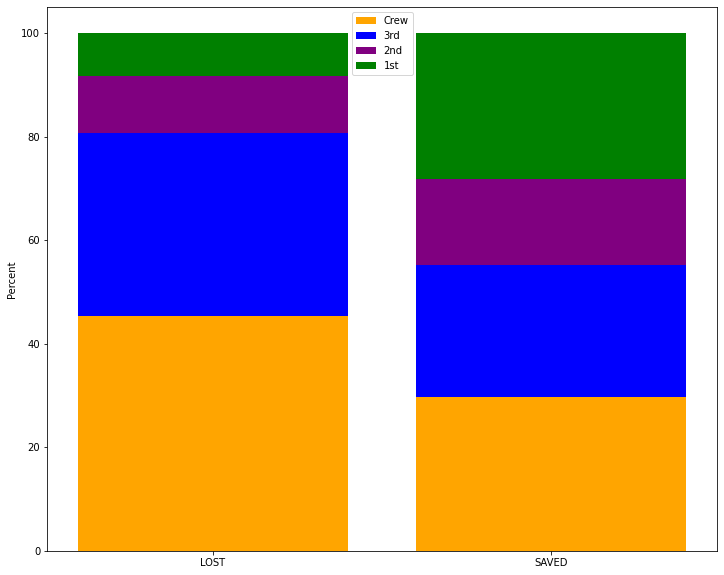

In [152]:
#Figure 3.5, page 79
titanic = pd.read_csv("datasets/titanic_2020.txt", sep = "\t")
table = pd.crosstab(index = titanic["Class"], columns = titanic["Survived"], normalize = "columns") * 100

fig,ax = plt.subplots(1,1, figsize = (12,10))

ax.bar(x = table.columns, height = table.loc["Crew"], color = "orange", label = "Crew")
ax.bar(x = table.columns, height = table.loc["3rd"], bottom = table.loc["Crew"], color = "blue", label = "3rd")
ax.bar(x = table.columns, height = table.loc["2nd"], bottom = table.loc["Crew"] + table.loc["3rd"], color = "purple", label = "2nd")
ax.bar(x = table.columns, height = table.loc["1st"], bottom = table.loc["Crew"] + table.loc["3rd"] + table.loc["2nd"], color = "green", label = "1st")
ax.set_ylabel("Percent")
ax.legend(loc = "upper center")
plt.show()

#### Section 3.4: Three Categorical Variables

In [153]:
# Table 3.6, page 81
okcupid = pd.read_csv("datasets/okcupid-catsdogs.txt", sep = "\t")

table = pd.crosstab(index = [okcupid["CatsDogsBoth"], okcupid["drugsY/N"]], columns = okcupid["Gender"], margins = True, normalize = "columns")
table

Gender                        F         M       All
CatsDogsBoth drugsY/N                              
Has Both     No        0.101237  0.070409  0.087242
             Yes       0.020610  0.022610  0.021518
Has cats     No        0.338005  0.247521  0.296930
             Yes       0.088376  0.102935  0.094985
Has dogs     No        0.389777  0.449028  0.416674
             Yes       0.061995  0.107497  0.082651

#### Example 3.8: Simpson’s Paradox: Gender Discrimination?

Question: No data readily available for this example. Can I skip this?